In [11]:
import pandas as pd

# Set options to show all columns
pd.set_option('display.max_columns', None)

# Upload csv file
data = r'C:\repos\immo-eliza-team6-analysis\analysis\PL_clean_data.csv' # Fill your path to file
df = pd.read_csv(data, sep = ',')

# Display first 5 rows
df.head()




,id,locality_name,Postal_code,Price,Subtype,Number_of_bedrooms,Living_area,Type_of_sale,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,epc
0,20252354,Ronse,9600,319000,House,3,125 m²,For sale,Rotterij,148,50.744176,3.625722,0,0,True,NaN,370 m²,NaN,4,To renovate,0,F
1,20251003,Geraardsbergen,9500,299999,House,3,167 m²,For sale,Pirrestraat,17,50.752121,3.925495,0,0,True,NaN,895 m²,Installed,2,Good,0,D
2,20252002,Mechelen,2800,275000,House,3,154 m²,For sale,Caputsteenstraat,150,51.033269,4.491795,0,0,True,10 m²,20 m²,Semi equipped,2,To renovate,0,E
3,20252352,Gooik,1755,295000,House,3,172 m²,For sale,Strijlandstraat,45,50.791877,4.084293,0,0,True,NaN,300 m²,NaN,3,To renovate,0,F
4,20250985,Oetingen,1755,560000,House,4,350 m²,For sale,Blijkheerstraat,70,50.775412,4.047057,0,0,True,40 m²,32 m²,Installed,3,Good,0,C


In [12]:
df.describe()
df.shape

(6602, 22)

In [22]:
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use('ggplot')

df.corr(method='pearson', min_periods=1, numeric_only=True)

,id,Price,Number_of_bedrooms,latitude,longitude,Open_fire,Swimming_Pool,Number_of_facades,Furnished
id,1.000000,-0.072798,-0.026110,0.053295,-0.071973,-0.011482,-0.031820,-0.063131,-0.000333
Price,-0.072798,1.000000,0.342982,0.225724,-0.063304,0.114492,0.281196,0.165728,0.029899
Number_of_bedrooms,-0.026110,0.342982,1.000000,0.050438,0.003854,0.086022,0.149926,0.108609,-0.013270
latitude,0.053295,0.225724,0.050438,1.000000,-0.498146,-0.007231,0.032508,-0.100077,-0.011719
longitude,-0.071973,-0.063304,0.003854,-0.498146,1.000000,0.063535,0.045417,0.235991,0.007570
Open_fire,-0.011482,0.114492,0.086022,-0.007231,0.063535,1.000000,0.112612,0.148447,0.009690
Swimming_Pool,-0.031820,0.281196,0.149926,0.032508,0.045417,0.112612,1.000000,0.128887,0.021800
Number_of_facades,-0.063131,0.165728,0.108609,-0.100077,0.235991,0.148447,0.128887,1.000000,-0.023197
Furnished,-0.000333,0.029899,-0.013270,-0.011719,0.007570,0.009690,0.021800,-0.023197,1.000000


In [25]:
# Removing unnecessary columns

columns_to_drop = ['latitude', 'longitude', 'id', 'Type_of_sale', 'street', 'number']
df = df.drop(columns=columns_to_drop, errors='ignore')

# Display first 5 rows
df.shape


(6602, 16)

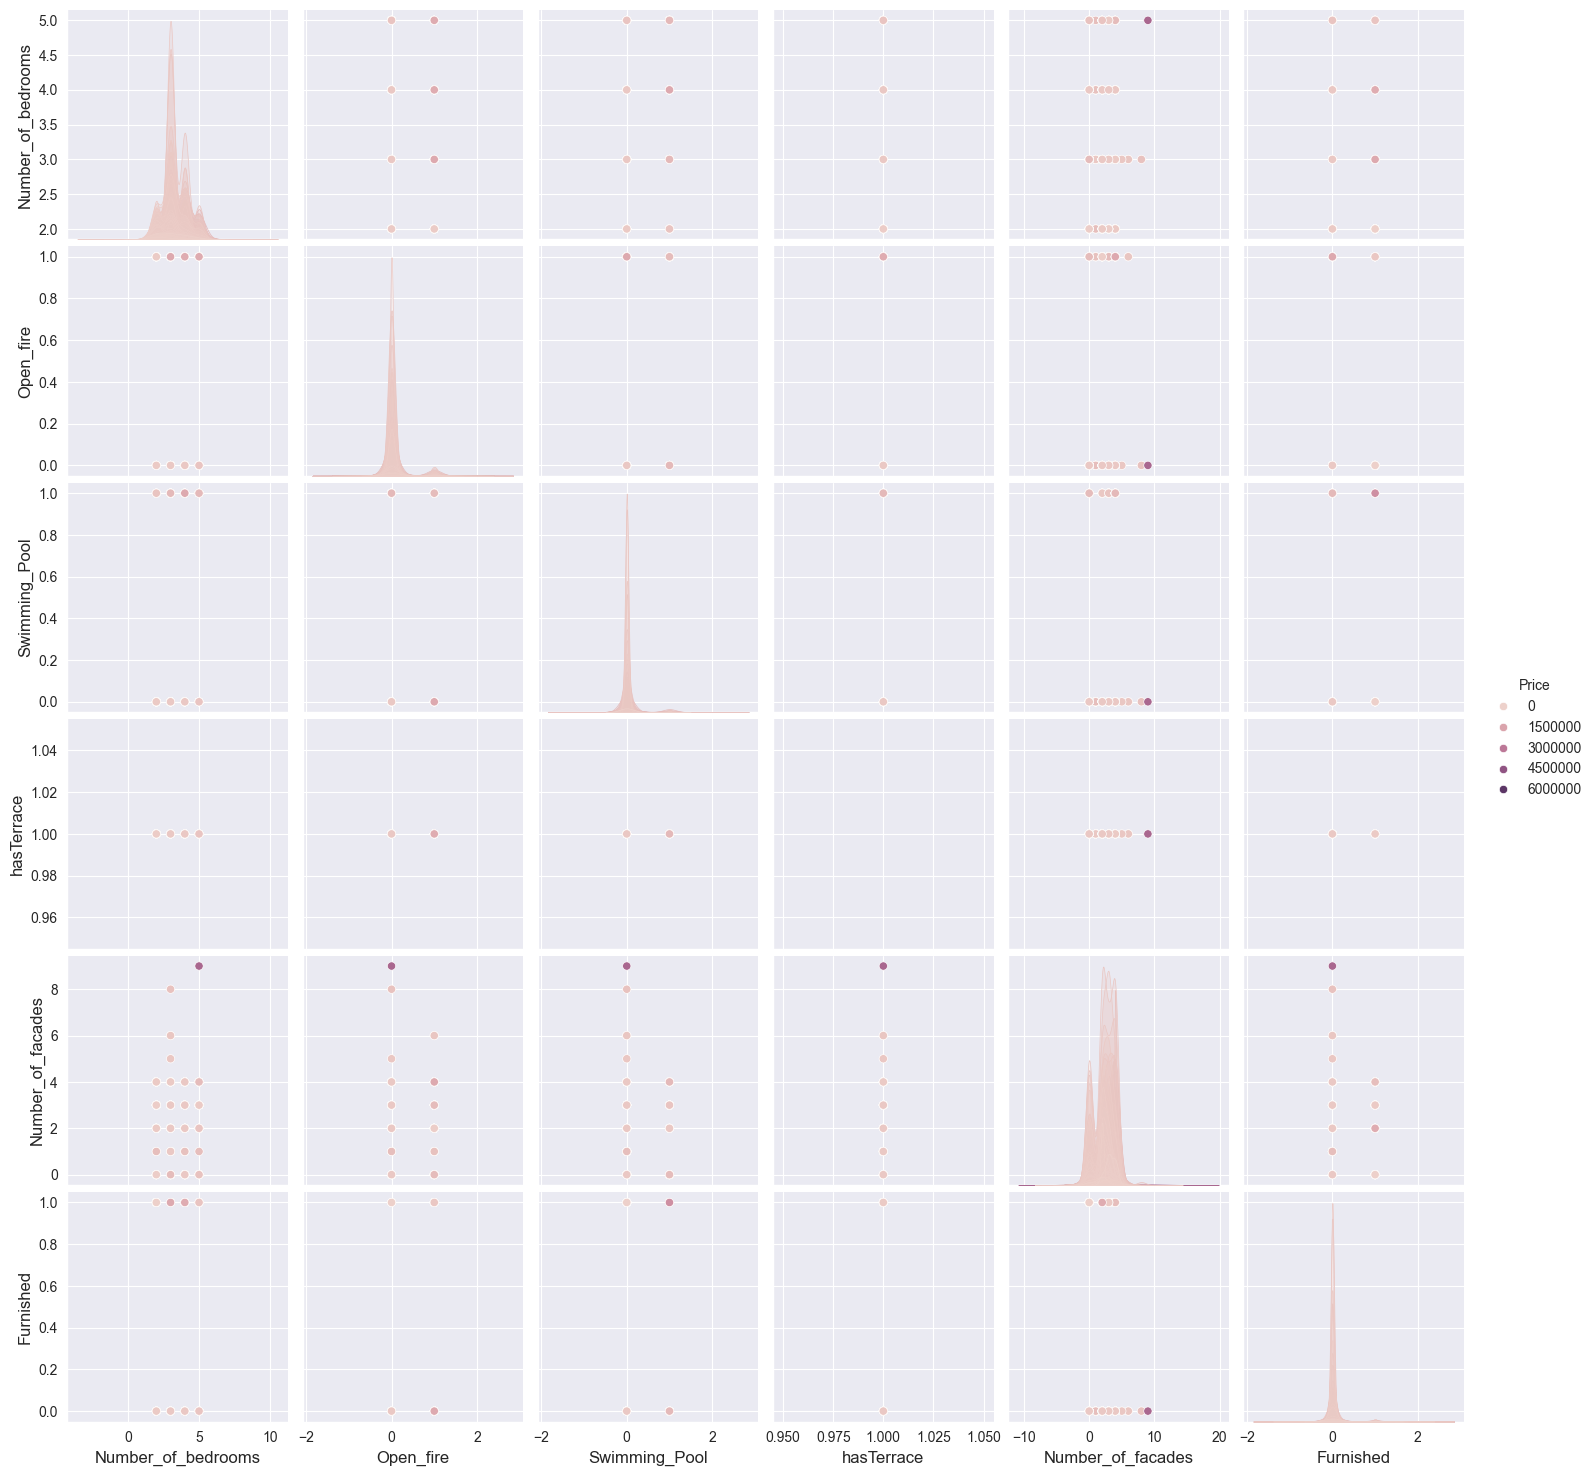

In [29]:
sns.pairplot(df, hue='Price')
plt.show()

In [36]:
print(df.columns)

Index(['locality_name', 'Postal_code', 'Price', 'Subtype',
       'Number_of_bedrooms', 'Living_area', 'Open_fire', 'Swimming_Pool',
       'hasTerrace', 'terraceSurface', 'gardenSurface', 'Kitchen_type',
       'Number_of_facades', 'State_of_building', 'Furnished', 'epc'],
      dtype='object')


KeyError: 'category_col'

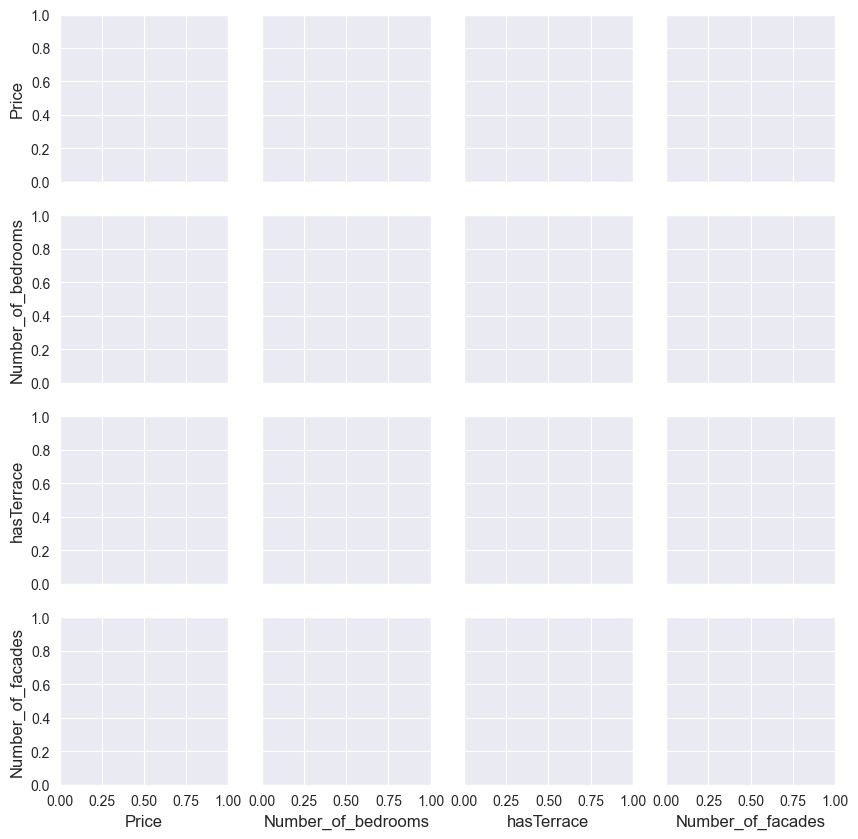

In [37]:
#sns.set_style('darkgrid')

# Convert categorical columns to numeric codes
df['Kitchen_type'] = df['Kitchen_type'].astype('category')
df['State_of_building'] = df['State_of_building'].astype('category')
df['Furnished'] = df['Furnished'].astype('category')

#cols_to_plot = ['Price', 'Subtype', 'Number_of_bedrooms', 'Living_area', 'Open_fire', 'Swimming_Pool', 'hasTerrace', 'gardenSurface' , 'Kitchen_type','Number_of_facades','State_of_building','Furnished','epc']
cols_to_plot = ['Price', 'Number_of_bedrooms', 'Living_area', 'hasTerrace', 'gardenSurface' , 'Kitchen_type','Number_of_facades','State_of_building','Furnished','epc']
sns.pairplot(df[cols_to_plot], hue='category_col')


plt.show()

